In [1]:
import warnings

from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 


In [2]:
%%capture

from ding0.core import NetworkDing0
from ding0.tools.logger import setup_logger
from ding0.tools.results import save_nd_to_pickle
from ding0.tools.plots import plot_mv_topology
from egoio.tools import db
from sqlalchemy.orm import sessionmaker
import oedialect

from ding0.tools import results # to load pickl file


# create new network
nd = NetworkDing0(name='network')


# set ID of MV grid district
mv_grid_districts = [40] # fn 40, 912

In [3]:
# TODO set in config file
ding0_default=False

engine = db.connection(section='oedb_dialect', readonly=True)
session = sessionmaker(bind=engine)()
create_lvgd_geo_method='convex_hull' # off, convex_hull

In [4]:
%%time

# STEP 1
nd.import_mv_grid_districts(session, mv_grid_districts_no=mv_grid_districts,
                            ding0_default=ding0_default, need_parameterization=True,
                            create_lvgd_geo_method=create_lvgd_geo_method)

Finding connected graph, iteration 1 of max. 4.
Simplified graph: 94 to 22 nodes, 170 to 26 edges
Simplified graph: 716 to 479 nodes, 1484 to 1010 edges
at least one node trespasses dist to substation.                                cluster again with n_clusters+=1
after increment; n_cluster 5
all clusters are in range
=====> MV Grid Districts imported


CPU times: total: 3.98 s
Wall time: 6.41 s


In [5]:
%%time

# STEP 2
# nd.import_generators(session, debug=False)

# STEP 3
nd.mv_parametrize_grid(debug=False)

CPU times: total: 0 ns
Wall time: 0 ns


In [6]:
# STEP 4: Validate MV Grid Districts
msg = nd.validate_grid_districts()

In [7]:
%%time

# STEP 5: Build LV grids
nd.build_lv_grids()

CPU times: total: 2.8 s
Wall time: 2.79 s


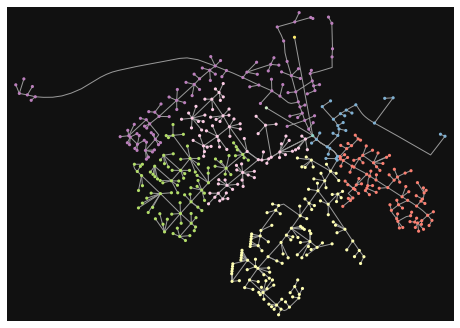

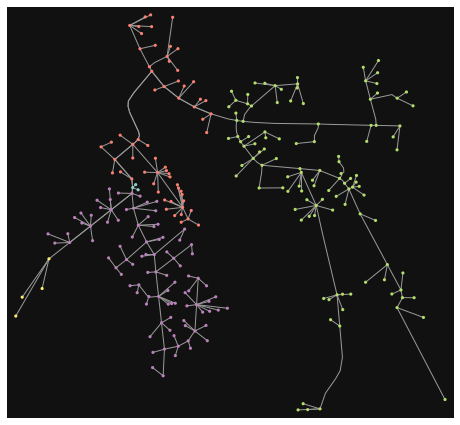

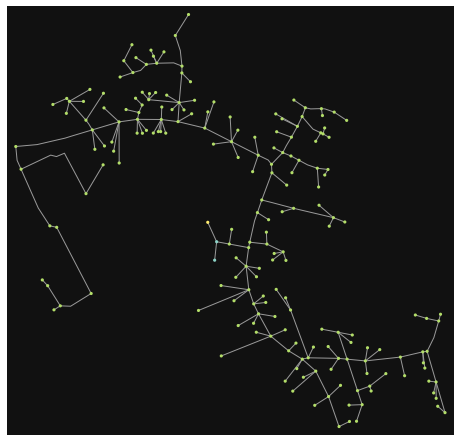

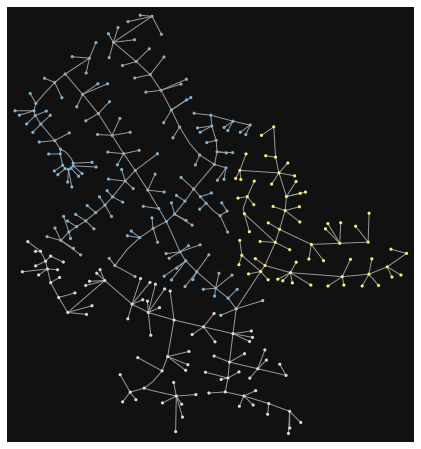

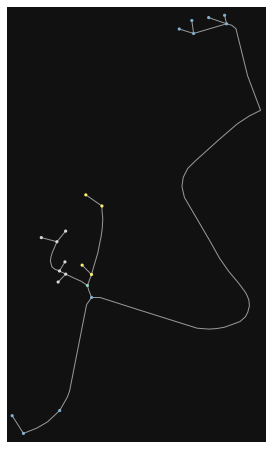

In [9]:
import osmnx as ox

for lvgd in nd._mv_grid_districts[0]._lv_load_areas[0]._lv_grid_districts:
    nc = ox.plot.get_node_colors_by_attr(lvgd.graph_district, attr='feederID', cmap="Set3")
    ox.plot_graph(lvgd.graph_district, node_color=nc, node_size=10)
